In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay


warnings.filterwarnings('ignore')
pd.pandas.set_option("display.max_columns", None)
# create dataframe
df = pd.read_csv(r"./data/clustered_data.csv")
# Print shape of Dataset
print(df.shape)


(2240, 22)


#### Split X and y

In [2]:
X = df.drop("cluster", axis = 1)
y = df["cluster"] 

### Grid Search


### Select the best Model

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

from xgboost import XGBClassifier
from sklearn import metrics

models = {
    "Random Forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "K-Neighbours Classifier" : KNeighborsClassifier(),
    "XGBClassifier" : XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}


In [4]:
# Create a function which can evaluate 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input 
    It splits the data into Train Test and Split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: DataFrame which contains report of all models metrics with cost 
    '''

    # Seperate dataset into train test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    models_list = []
    scores = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) 

        y_pred = model.predict(X_test)

        score = accuracy_score(y_test, y_pred)


        model_name = list(models.keys())[i]
        print(f"------score for -------{model_name} ----")
        print(score)
        models_list.append(model_name)
        scores.append(score)

    print()

    report = pd.DataFrame()
    report ['Model_name'] = models_list
    report['Score'] = scores
    return report

### Let's check the report

In [5]:
report = evaluate_models(X, y, models)

------score for -------Random Forest ----
0.9642857142857143
------score for -------Decision Tree ----
0.9464285714285714
------score for -------Logistic Regression ----
0.8772321428571429
------score for -------Gradient Boosting ----
0.96875
------score for -------K-Neighbours Classifier ----
0.8102678571428571
------score for -------XGBClassifier ----
0.9709821428571429
------score for -------AdaBoost Classifier ----
0.921875



In [6]:
report.sort_values('Score')

,Model_name,Score
4,K-Neighbours Classifier,0.810268
2,Logistic Regression,0.877232
6,AdaBoost Classifier,0.921875
1,Decision Tree,0.946429
0,Random Forest,0.964286
3,Gradient Boosting,0.968750
5,XGBClassifier,0.970982


* The XGBClassifier is Performing Best so We will move forward with it

#### Split into Train and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
994,68,2,0,1,2,64587.0,108.0,4032.0,49,66,0,16,0.0,6,20.0,1,1,4,2,0,3
2162,65,2,1,1,1,47320.0,414.0,4357.0,10,200,19,111,50.0,15,19.0,5,1,8,6,0,6
906,61,2,0,0,0,86429.0,1449.0,4245.0,10,464,28,556,29.0,18,37.0,7,4,7,0,1,2
572,44,1,0,1,1,38593.0,177.0,4314.0,42,51,12,49,17.0,24,24.0,4,1,3,3,0,8
1877,64,2,1,0,0,72905.0,1515.0,4184.0,52,407,81,445,120.5,81,126.5,3,7,9,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,53,2,1,1,2,44078.0,41.0,4035.0,17,24,1,10,2.0,0,4.0,2,0,3,2,0,5
1095,43,2,0,1,1,61825.0,424.0,4351.0,56,162,50,100,55.0,30,27.0,4,2,8,1,0,4
1130,71,3,1,1,1,67381.0,957.0,4555.0,67,815,8,53,11.0,0,70.0,2,2,9,4,1,7
1294,59,4,0,1,2,48918.0,62.0,4103.0,21,52,0,9,0.0,0,1.0,1,0,4,2,0,4


#### Let's do Hyperparameter tuning

## Grid search cross validation

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.01],
    'reg_lambda': [1, 1.5],
    'min_child_weight': [1, 3]
}

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss'
)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,      # Just 20 random combos!
    scoring='accuracy',
    cv=3,           # 3-fold CV is fine for 2240 samples
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("✅ Best hyperparameters:", random_search.best_params_)
print("✅ Best CV accuracy:", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best hyperparameters: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
✅ Best CV accuracy: 0.9738552754640314


In [10]:
best_XGB_model = XGBClassifier(subsample =  0.7, reg_lambda = 1.5, reg_alpha = 0, n_estimators = 150, min_child_weight = 3, max_depth = 3,learning_rate = 0.1, gamma = 0.1, colsample_bytree = 1.0)

### Lets check the Report now

In [11]:
best_model = best_XGB_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_pred, y_test)

cr = classification_report(y_pred, y_test)
print(score)
print(cr)

0.9717261904761905
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       253
           1       0.97      0.95      0.96       240
           2       0.97      0.97      0.97       179

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



## Confusion Matrix of the model

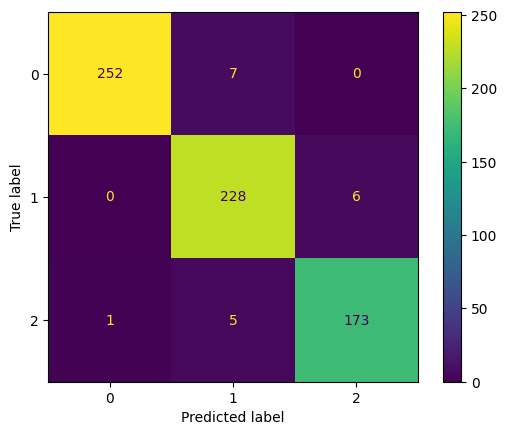

In [12]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)